## 2.3.2 KNN (K-Nearest Neighbors), k-최근접 이웃
- 훈련 데이터셋을 특별한 작업을 하지 않고 저장하는 것
    - 이후에 새로운 데이터 포인트를 예측할 때에는 알고리즘이 훈련 데이터셋에서 가장 가까운 데이토 포인트 (최근접 이웃)을 찾음
- 최근접 이웃을 찾는 방법은 입력될 데이터와 거리상으로 가까운 이웃을 몇개를 뽑을 것인가에 따라 데이터 분류가 다를 수 있음

In [3]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

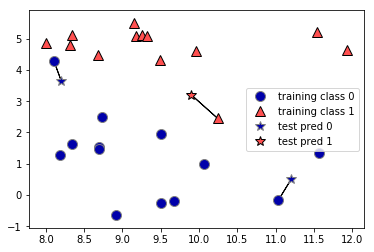

In [4]:
# 단 하나의 이웃만 고려
mglearn.plots.plot_knn_classification(n_neighbors=1)

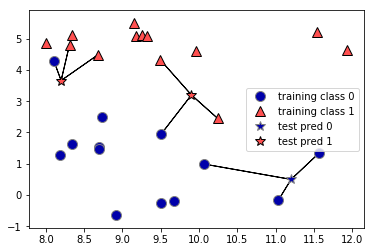

In [5]:
# 세개의 이웃만 고려
mglearn.plots.plot_knn_classification(n_neighbors=3)

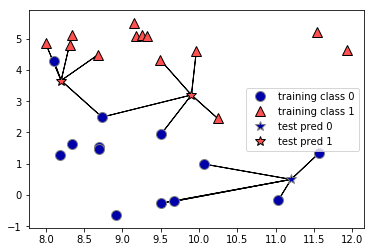

In [6]:
# 다셋 개의 이웃만 고려
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [7]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
print("predict test set: {}".format(clf.predict(X_test)))

predict test set: [1 0 1 0 1 0 0]


In [11]:
print("accuracy of test set: {:.2f}".format(clf.score(X_test, y_test)))

accuracy of test set: 0.86


- KNeighborsClassifier 분석
    - 2차원 데이터 셋 -> xy 평면에 표현 가능
    - 각 데이터 포인터가 속한 클래스에 따라 평면에 색을 칠함
    - 클래스 a와 클래스 1로 지정한 영역으로 알고리즘이 나누게 되는 결정 경계를 볼 수 있음
    - 이후 코드는 이웃이 하나, 셋, 아홉일때 결정 경계를 보여줌

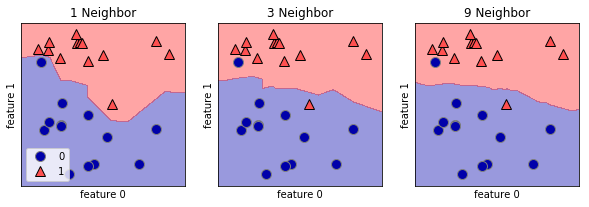

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

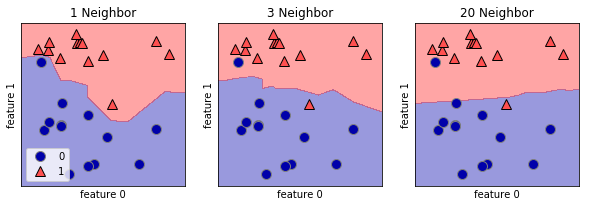

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 20], axes):
    # fit 메서드는 self 객체를 반환
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

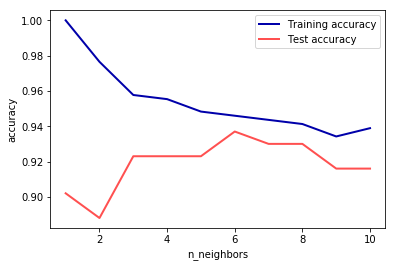

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- k-최근접 이웃 회귀
    - 회귀 분석에서도 쓰이는 알고리즘
    - 최근접 이웃을 한 개만 이용할 때 예측은 가장 가까운 이웃의 타깃값

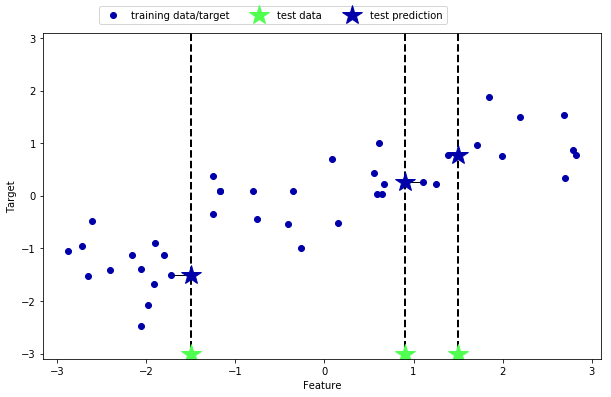

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

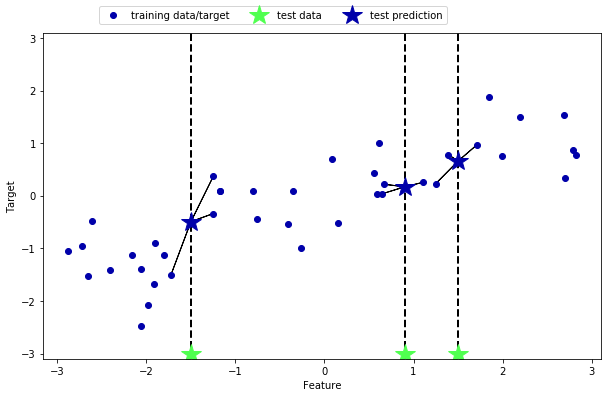

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

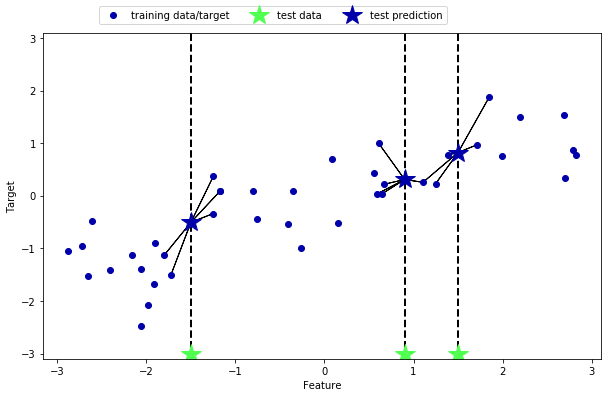

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 셋과 테스트 셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [23]:
print("prediction of test set:\n{}".format(reg.predict(X_test)))

prediction of test set:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [24]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


- KNeighborsRegressor 분석

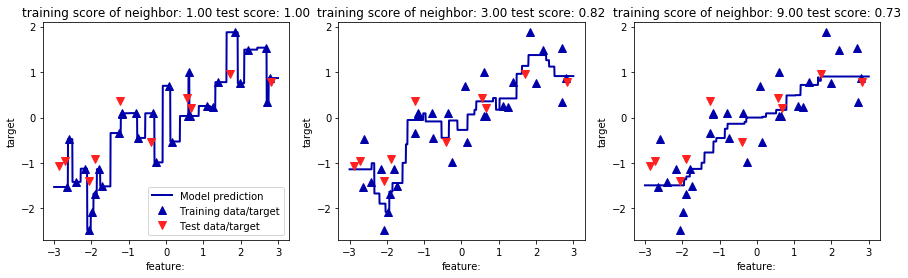

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트를 생성
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax, in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 수행
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("training score of neighbor: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature:")
    ax.set_ylabel("target")
axes[0].legend(["Model prediction", "Training data/target", "Test data/target"], loc="best")

- 장단점과 매개변수
    - KNeighbors 분류기에서 중요한 매개변수는 두 개
        - 데이터 포인트 사이의 거리를 재는 것과 이웃의 수
            - 이웃의 수는 3개 또는 5개와 같이 적을 때 잘 작동하나 잘 조정해야 하는 변수
            - 거리를 재는 방법은 기본적으로는 유클리디안 거리 방식을 사용하나 상황에 따라 다른 방법도 사용할 수 있음
    - 장점
        - 이해하기 매우 쉬운 모델
        - 많이 조정하지 않아도 자주 좋은 성능을 발휘
        - 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점
    - 단점
        - 훈련 세트가 매우 크면 (특성의 수나 샘플의 수가 클 경우) 예측이 느려짐
        - k-NN 알고리즘을 사용할 땐 데이터를 전처리하는 과정이 매우 중요
        - 수백 개 이상의 많은 특성을 가진 데이터 셋에서는 잘 동작하지 않음
        - 특성 값 대부분이 0인 데이터셋과는 특히 잘동작하지 않음